CLAHE-- Contrast Limited Adaptive Histogram Equalization

In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
image=cv2.imread("/content/giraffe.avif")

In [4]:
image

array([[[177, 163, 151],
        [177, 163, 151],
        [178, 164, 152],
        ...,
        [166, 153, 129],
        [166, 153, 129],
        [165, 152, 128]],

       [[177, 163, 151],
        [177, 163, 151],
        [177, 163, 151],
        ...,
        [166, 153, 129],
        [165, 152, 128],
        [165, 152, 128]],

       [[177, 163, 151],
        [177, 163, 151],
        [177, 163, 151],
        ...,
        [166, 153, 129],
        [165, 152, 128],
        [165, 152, 128]],

       ...,

       [[  0,   6,  19],
        [  1,  10,  23],
        [  1,  17,  29],
        ...,
        [ 47,  83, 107],
        [ 39,  75,  99],
        [ 41,  77, 101]],

       [[  0,   5,  20],
        [  1,  10,  24],
        [  0,  16,  29],
        ...,
        [ 39,  72,  97],
        [ 40,  73,  98],
        [ 45,  78, 103]],

       [[  0,   6,  21],
        [  2,  11,  25],
        [  1,  17,  30],
        ...,
        [ 40,  73,  98],
        [ 43,  76, 101],
        [ 48,  81, 106]]

In [5]:
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

CLAHE = Contrast Limited Adaptive Histogram Equalization

It improves contrast locally by dividing the image into small tiles
(Example: 8×8 grid = 64 small blocks).
Then histogram equalization is applied inside each tile.

It also prevents noise amplification — that’s where clipLimit helps!

Parameter	Meaning	Effect

clipLimit=2.0	Sets the max allowed histogram amplification	Higher = more contrast but more noise

tileGridSize=(8,8)	Number of local blocks (tiles)	Smaller tiles → more local contrast enhancement

Typical values:

clipLimit	Result

1.0	Very mild contrast increase

2.0 (default)	Balanced enhancement

3–5	Stronger contrast but risk noise

=>5	Over-sharpening, grainy imag

In [6]:
Equlaized_image=cv2.equalizeHist(image_gray)
clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [7]:
clahe.apply(image_gray)

array([[126, 126, 129, ..., 110, 110, 108],
       [126, 126, 126, ..., 110, 108, 108],
       [126, 126, 126, ..., 110, 108, 108],
       ...,
       [  6,   9,  15, ..., 127, 107, 112],
       [  6,   9,  14, ..., 103, 105, 117],
       [  7,  10,  15, ..., 105, 112, 124]], dtype=uint8)

In [8]:
clahe_equlaized_image=clahe.apply(image_gray)

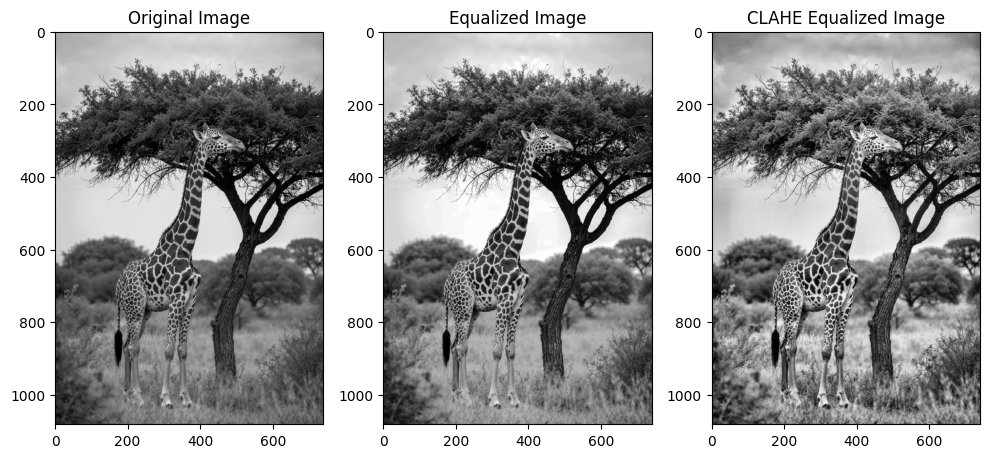

In [9]:
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image_gray,cmap="gray")

plt.subplot(1,3,2)
plt.title("Equalized Image")
plt.imshow(Equlaized_image,cmap="gray")

plt.subplot(1,3,3)
plt.title("CLAHE Equalized Image")
plt.imshow(clahe_equlaized_image,cmap="gray")


plt.tight_layout()
plt.show()
#

In [10]:
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#

In [11]:
# on RGB Image
#YUV we need to apply on 1st channel which is lightness

yuv_image=cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
clahe_yuv=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

yuv_image[:,:,0]=clahe_yuv.apply(yuv_image[:,:,0])

yuv_image_bgr=cv2.cvtColor(yuv_image,cv2.COLOR_YUV2BGR)

bgr_image_rgb= cv2.cvtColor(yuv_image_bgr,cv2.COLOR_BGR2RGB)





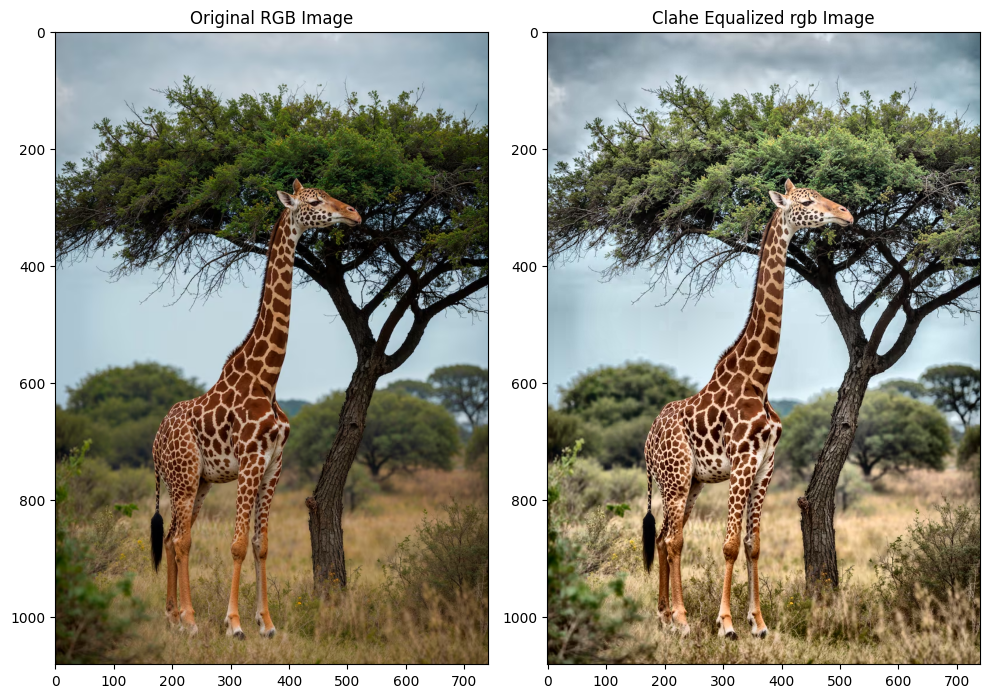

In [12]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title("Original RGB Image")
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title("Clahe Equalized rgb Image")
plt.imshow(bgr_image_rgb)


plt.tight_layout()
plt.show()
#

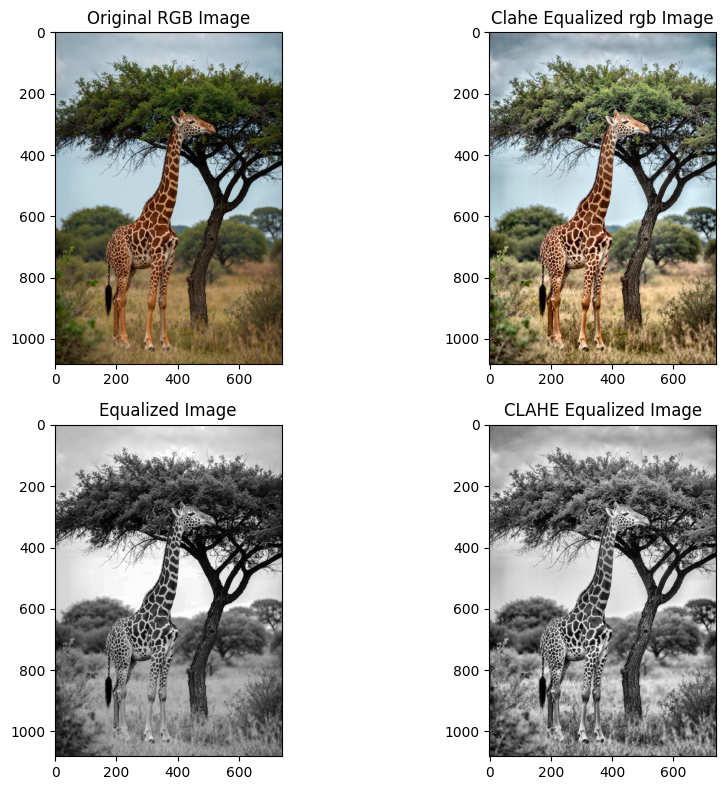

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Original RGB Image")
plt.imshow(image_rgb)

plt.subplot(2,2,2)
plt.title("Clahe Equalized rgb Image")
plt.imshow(bgr_image_rgb)

plt.subplot(2,2,3)
plt.title("Equalized Image")
plt.imshow(Equlaized_image,cmap="gray")

plt.subplot(2,2,4)
plt.title("CLAHE Equalized Image")
plt.imshow(clahe_equlaized_image,cmap="gray")



plt.tight_layout()
plt.show()
#

In [ ]:
# Clahe Cannot applied on the equalized image
#we need to apply on the orgial image either gray sclae and rgb image